# LiteCoin_Data_Analysis 
Data Collection and Summary Stats


In [2]:
import zstandard as zstd
import shutil
import os

def decompress_zst(input_file, output_file, max_samples):
    with open(input_file, 'rb') as compressed_file:
        decomp = zstd.ZstdDecompressor()
        with open(output_file, 'wb') as output:
            total_samples = 0
            for chunk in decomp.read_to_iter(compressed_file):
                output.write(chunk)
                total_samples += chunk.count(b'\n')
                if total_samples >= max_samples:
                    break

# List of input files
input_files = ['/Users/shivanipaunikar/Downloads/Project- crypto/Litecoin/LC.zst', '/Users/shivanipaunikar/Downloads/Project- crypto/Litecoin/LS.zst']

# Output directory where decompressed files will be stored
output_directory = '/Users/shivanipaunikar/Downloads/Project- crypto/output'

# Maximum number of samples you want to use
max_samples = 5000

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Loop through each input file and decompress
for input_file in input_files:
    # Generate the output file path by removing the .zst extension and adding .json
    output_file = os.path.join(output_directory, os.path.splitext(os.path.basename(input_file))[0] + '.json')
    
    print(f"Processing: {input_file}")
    
    # Decompress the input file, limiting to max_samples, and save it to the output file path
    decompress_zst(input_file, output_file, max_samples)
    
    print(f"Completed: {input_file} -> {output_file}")

print("All files processed.")


Processing: /Users/shivanipaunikar/Downloads/Project- crypto/Litecoin/LC.zst
Completed: /Users/shivanipaunikar/Downloads/Project- crypto/Litecoin/LC.zst -> /Users/shivanipaunikar/Downloads/Project- crypto/output/LC.json
Processing: /Users/shivanipaunikar/Downloads/Project- crypto/Litecoin/LS.zst
Completed: /Users/shivanipaunikar/Downloads/Project- crypto/Litecoin/LS.zst -> /Users/shivanipaunikar/Downloads/Project- crypto/output/LS.json
All files processed.


In [3]:
import pandas as pd
import json
import os

# Define the output directory where the JSON files were decompressed
output_directory = '/Users/shivanipaunikar/Downloads/Project- crypto/output'

# Function to fix JSON syntax errors
def fix_json_syntax(input_file, output_file):
    with open(input_file, 'r') as input_json, open(output_file, 'w') as output_json:
        for line in input_json:
            try:
                json_obj = json.loads(line)
                corrected_line = json.dumps(json_obj) + '\n'
                output_json.write(corrected_line)
            except json.JSONDecodeError as e:
                # Handle JSON syntax errors here or simply skip problematic lines
                print(f"Skipping line due to JSON syntax error: {line.strip()}")
                continue

# Specify your input and output file paths for fixing 'Bs.json' syntax
input_file_path_Ls = os.path.join(output_directory, 'Ls.json')
output_file_path_Ls = os.path.join(output_directory, 'Ls_fixed.json')

# Call the function to fix JSON syntax errors in 'Bs.json'
fix_json_syntax(input_file_path_Ls, output_file_path_Ls)

# Specify your input and output file paths for fixing 'Bc.json' syntax
input_file_path_Lc = os.path.join(output_directory, 'Lc.json')
output_file_path_Lc = os.path.join(output_directory, 'Lc_fixed.json')

# Call the function to fix JSON syntax errors in 'Bc.json'
fix_json_syntax(input_file_path_Lc, output_file_path_Lc)

# Define a function to read JSON data line by line
def read_json_lines(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            yield json.loads(line)

# Use os.path.join to construct file paths
submission_data = list(read_json_lines(output_file_path_Ls))  
comment_data = list(read_json_lines(output_file_path_Lc))  

# Create DataFrames
submission_df = pd.DataFrame(submission_data)
comment_df = pd.DataFrame(comment_data)

# Filter for Bitcoin-related data (you may need to adjust the filter)
Litecoin_submissions = submission_df[submission_df['title'].str.contains('Litecoin', case=False, na=False)]
Litecoin_comments = comment_df[comment_df['body'].str.contains('Litecoin', case=False, na=False)]

# Sample 5000 observations with replacement
Litecoin_submissions_sample = Litecoin_submissions.sample(n=5000, replace=True)
Litecoin_comments_sample = Litecoin_comments.sample(n=5000, replace=True)

# Export to CSV
Litecoin_submissions_sample.to_csv('Litecoin_submissions_sample.csv', index=False)
Litecoin_comments_sample.to_csv('Litecoin_comments_sample.csv', index=False)


Skipping line due to JSON syntax error: {"author_flair_css_class":null,"ups":1,"media":null,"link_flair_css_class":null,"is_self":true,"created_utc":1386099234,"selftext":"I made two iWidgets this weekend, and figured I'd give them out for anyone else that's interested in using them.\n\n1. [CryptoExchangeIWidget](https://sourceforge.net/projects/cryptoexchangeiwidget/)\n  - This iWidget shows the current exhange rates for BTC/LTC/USD from BTC-e.\n2. [LTCMinterIWidget](https://sourceforge.net/projects/ltcminteriwidget/)\n  - This iWidget shows your miner data, and supports WeMineLTC and Give-Me-Coins.\n\n[Here is a screenshot of both iWidgets.](http://i.imgur.com/Y2KxG4T.jpg)\n\nThe CryptoExchangeIWidget iWidget is the second one down, and the bottom two are both versions of LTCMinterIWidget (as you can see, I don't use Give-Me-Coins, so the values are all 0s).\n\nIt's probably pretty obvious that I'm not much of a designer, so let me know what you think would help with the appearance, 

In [4]:
# Load the CSV files
Litecoin_submissions_df = pd.read_csv('Litecoin_submissions_sample.csv')
Litecoin_comments_df = pd.read_csv('Litecoin_comments_sample.csv')


In [5]:
# Display the columns of the DataFrame
print("Columns in Litecoin_submissions_df:")
print(Litecoin_submissions_df.columns)

# Display a sample of the DataFrame
print("Sample data in Litecoin_submissions_df:")
print(Litecoin_submissions_df.head())

# Repeat the same for litecoin_comments_df if needed
print("Columns in Litecoin_comments_df:")
print(Litecoin_comments_df.columns)

print("Sample data in Litecoin_comments_df:")
print(Litecoin_comments_df.head())


Columns in Litecoin_submissions_df:
Index(['downs', 'link_flair_text', 'distinguished', 'media', 'url',
       'link_flair_css_class', 'id', 'edited', 'num_reports', 'created_utc',
       'banned_by', 'name', 'subreddit', 'title', 'author_flair_text',
       'is_self', 'author', 'media_embed', 'permalink',
       'author_flair_css_class', 'selftext', 'domain', 'num_comments', 'likes',
       'clicked', 'thumbnail', 'saved', 'subreddit_id', 'ups', 'approved_by',
       'score', 'selftext_html', 'created', 'hidden', 'over_18', 'mod_reports',
       'user_reports', 'stickied', 'secure_media', 'secure_media_embed',
       'report_reasons', 'gilded', 'retrieved_on'],
      dtype='object')
Sample data in Litecoin_submissions_df:
   downs  link_flair_text distinguished media  \
0      0              NaN           NaN   NaN   
1      0              NaN           NaN   NaN   
2      0              NaN           NaN   NaN   
3      0              NaN           NaN   NaN   
4      0              

In [6]:
import pandas as pd

# Load the data into DataFrames (assuming you already have them loaded)
Litecoin_submissions_df = pd.read_csv('Litecoin_submissions_sample.csv')
Litecoin_comments_df = pd.read_csv('Litecoin_comments_sample.csv')

# Convert 'created_utc' columns to datetime objects
Litecoin_submissions_df['created_utc'] = pd.to_datetime(Litecoin_submissions_df['created_utc'], unit='s')
Litecoin_comments_df['created_utc'] = pd.to_datetime(Litecoin_comments_df['created_utc'], unit='s')

# Calculate the range of dates available
date_range_submissions = Litecoin_submissions_df['created_utc'].min(), Litecoin_submissions_df['created_utc'].max()
date_range_comments = Litecoin_comments_df['created_utc'].min(), Litecoin_comments_df['created_utc'].max()

print("Range of dates available in bitcoin_submissions_df:", date_range_submissions)
print("Range of dates available in bitcoin_comments_df:", date_range_comments)

# Calculate the number of posts, comments, and authors for each day
posts_per_day_submissions = Litecoin_submissions_df.groupby(Litecoin_submissions_df['created_utc'].dt.date).size()
comments_per_day = Litecoin_comments_df.groupby(Litecoin_comments_df['created_utc'].dt.date).size()
unique_authors_per_day_submissions = Litecoin_submissions_df.groupby(Litecoin_submissions_df['created_utc'].dt.date)['author'].nunique()

# Display the results
print("\nNumber of posts per day in Litecoin_submissions_df:")
print(posts_per_day_submissions)
print("\nNumber of comments per day in Litecoin_comments_df:")
print(comments_per_day)
print("\nNumber of unique authors per day in Litecoin_submissions_df:")
print(unique_authors_per_day_submissions)


Range of dates available in bitcoin_submissions_df: (Timestamp('2011-10-16 15:04:05'), Timestamp('2013-12-03 22:19:04'))
Range of dates available in bitcoin_comments_df: (Timestamp('2012-02-09 07:52:27'), Timestamp('2013-04-13 14:03:58'))

Number of posts per day in Litecoin_submissions_df:
created_utc
2011-10-16      1
2011-10-25      4
2012-01-11      2
2012-02-08      4
2012-02-09      3
             ... 
2013-11-29    332
2013-11-30    214
2013-12-01    116
2013-12-02    102
2013-12-03     16
Length: 296, dtype: int64

Number of comments per day in Litecoin_comments_df:
created_utc
2012-02-09     18
2012-02-10      8
2012-02-11      6
2012-02-15      6
2012-03-15     10
2012-03-17      5
2012-03-19      7
2012-04-29      6
2012-11-02      8
2013-01-20      3
2013-02-04     16
2013-02-05      5
2013-02-11     22
2013-02-14      6
2013-02-25      4
2013-02-27      6
2013-03-05     23
2013-03-06     15
2013-03-07      6
2013-03-08     20
2013-03-09      5
2013-03-10     19
2013-03-11 

# Topic Modeling 

In [7]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import models
import gensim.corpora as corpora
import gensim

In [8]:
# Load the data into DataFrames (assuming you already have them loaded)
Litecoin_submissions_df = pd.read_csv('Litecoin_submissions_sample.csv')
Litecoin_comments_df = pd.read_csv('Litecoin_comments_sample.csv')

# Convert 'created_utc' columns to datetime objects
Litecoin_submissions_df['created_utc'] = pd.to_datetime(Litecoin_submissions_df['created_utc'], unit='s')
Litecoin_comments_df['created_utc'] = pd.to_datetime(Litecoin_comments_df['created_utc'], unit='s')

# Combine comments and submissions text
Litecoin_text = Litecoin_submissions_df['selftext'].dropna().tolist() + Litecoin_comments_df['body'].dropna().tolist()


In [9]:
# Text preprocessing
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

Litecoin_text = [preprocess_text(text) for text in Litecoin_text]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)

In [11]:
# Apply TF-IDF vectorization
Litecoin_tfidf = tfidf_vectorizer.fit_transform([' '.join(tokens) for tokens in Litecoin_text])

In [12]:
pip install gensim matplotlib pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [13]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt

# Assuming you have a list of preprocessed tokens called 'bitcoin_text'
# You can replace 'bitcoin_text' with your actual data
dictionary = Dictionary([tokens for tokens in Litecoin_text])
corpus = [dictionary.doc2bow(tokens) for tokens in Litecoin_text]

# Perform LDA topic modeling
lda_model_Litecoin = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=2)


In [14]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model_Litecoin, texts=Litecoin_text, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda:.4f}')


Coherence Score: 0.3517


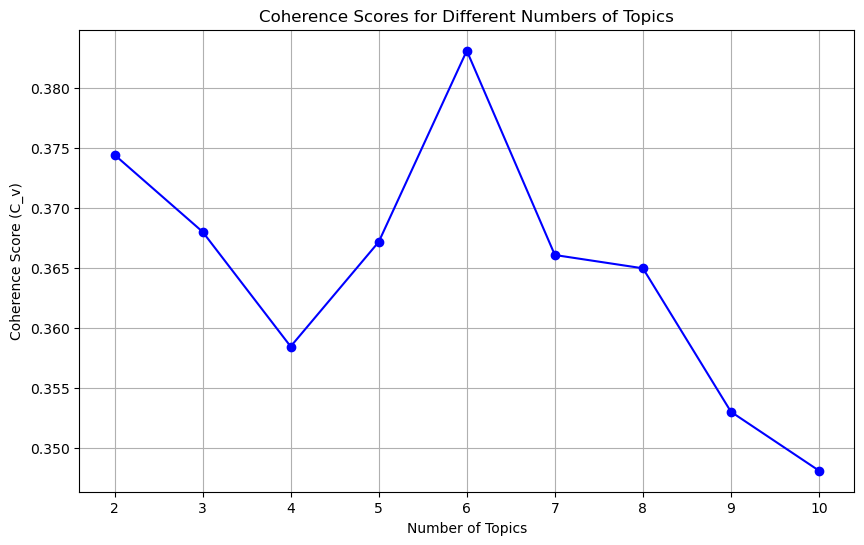

In [16]:
# Define a range of topic numbers to test
topics_range = range(2, 11)
coherence_scores = []

# Calculate coherence scores for different numbers of topics
for num_topics in topics_range:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=2)
    coherence_model = CoherenceModel(model=lda_model, texts=Litecoin_text, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Plot the coherence scores
plt.figure(figsize=(10, 6))
plt.plot(topics_range, coherence_scores, marker='o', linestyle='-', color='b')
plt.title('Coherence Scores for Different Numbers of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (C_v)')
plt.xticks(topics_range)
plt.grid(True)
plt.show()


In [18]:
# Print the topics generated by the LDA model
topics = lda_model_Litecoin.print_topics(num_words=6)  # You can adjust the number of words per topic
for topic in topics:
    print(topic)


(0, '0.048*"litecoin" + 0.031*"bitcoin" + 0.011*"mining" + 0.010*"would" + 0.009*"litecoins" + 0.008*"ltc"')
(1, '0.034*"litecoin" + 0.011*"bitcoin" + 0.008*"people" + 0.007*"ha" + 0.007*"http" + 0.007*"wallet"')
(2, '0.029*"litecoins" + 0.018*"buy" + 0.018*"litecoin" + 0.017*"would" + 0.014*"bitcoins" + 0.011*"ltc"')
(3, '0.020*"litecoin" + 0.013*"ltc" + 0.011*"http" + 0.011*"mining" + 0.010*"address" + 0.009*"litecoins"')
(4, '0.058*"http" + 0.021*"litecoin" + 0.013*"gt" + 0.012*"litecoins" + 0.009*"bitcoin" + 0.008*"wallet"')


# Sentiment Analysis

In [19]:
from textblob import TextBlob

# Combine Ethereum submissions and comments text into a single list
Litecoin_text = Litecoin_submissions_df['selftext'].dropna().tolist() + Litecoin_comments_df['body'].dropna().tolist()

# Preprocess the text data (if you haven't done this already)
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)  # Join tokens into a single string

Litecoin_text = [preprocess_text(text) for text in Litecoin_text]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
# Example preprocessing using NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

# Define a function to preprocess text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    
    # Other text cleaning steps (e.g., removing punctuation, stemming) can be added
    
    return " ".join(tokens)  # Convert tokens back to text

# Apply preprocessing to your text data
Litecoin_comments_df['cleaned_text'] = Litecoin_comments_df['body'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
# Define a function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    if polarity > 0.1:
        return "positive"
    elif polarity < -0.1:
        return "negative"
    else:
        return "neutral"

In [22]:
# Apply sentiment analysis to your preprocessed text data
sentiments = [get_sentiment(text) for text in Litecoin_text]


In [23]:
# Create a DataFrame to store sentiments (optional)
sentiments_df = pd.DataFrame({'Sentiment': sentiments})

In [24]:
# Print or analyze the sentiment results as needed
print(sentiments_df['Sentiment'].value_counts())  # Display sentiment counts


positive    3499
neutral     3276
negative     486
Name: Sentiment, dtype: int64


In [27]:
# Assuming you have already performed sentiment analysis and stored results in 'sentiments' list
# Combine both comments and submissions text into a single list
Litecoin_text = Litecoin_submissions_df['selftext'].dropna().tolist() + Litecoin_comments_df['body'].dropna().tolist()


# Print the first few comments and submissions with their sentiments
for i, (text, sentiment) in enumerate(zip(Litecoin_text, sentiments)):
    if i >= 10:  # Print the first 10 (5 comments + 5 submissions)
        break
    if i < 5:
        print(f"Comment {i + 1}:")
    else:
        print(f"Submission {i - 4}:")
    print("Text:", text)
    print("Sentiment:", sentiment)
    print()


Comment 1:
Text: LitecoinScout.com is a new block explorer for Litecoin. It is based on Abe but will be improved with several features to hopefully make it a preferred source of information on Litecoin addresses, transactions and the block chain. 

Please check it out at http://LitecoinScout.com and if there are any features you'd like to see in particular, consider this app to be at your service!
Sentiment: positive

Comment 2:
Text: Something to rival ebay. Like silkroad, but for legitimate purposes. I think what's important is that it have a feedback/reputation system to reduce scammers. Or if someone could implement a feedback/reputation system in the reddit markets...
Sentiment: positive

Comment 3:
Text: I have been able to convince so many of my friends to adopt Bitcoin simply by making bets with them (predominantly on our foosball games, but on pretty much anything else is well), and insisting that "I only wager in bitcoin", so that if they win, they have to download a wallet i

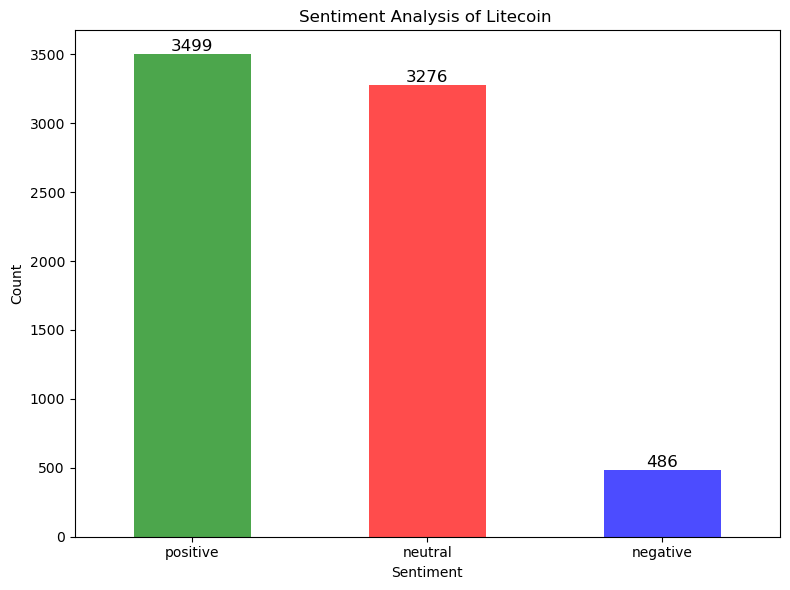

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already performed sentiment analysis and have a DataFrame 'sentiments_df'
# with a 'Sentiment' column containing sentiment labels (positive, negative, neutral)

# Count the occurrences of each sentiment label
sentiment_counts = sentiments_df['Sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'], alpha=0.7)
plt.title('Sentiment Analysis of Litecoin ')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Annotate the bars with counts
for i, count in enumerate(sentiment_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Emotion Analysis

In [28]:
pip install transformers torch

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Load the pre-trained emotion classification model and tokenizer
model_name = "michellejieli/emotion_text_classifier"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Combine both comments and submissions text into a single list
Litecoin_text = Litecoin_submissions_df['selftext'].dropna().tolist() + Litecoin_comments_df['body'].dropna().tolist()


In [ ]:
def get_emotion(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        logits = model(**inputs).logits
    predicted_class = torch.argmax(logits, dim=1).item()
    
    # Define the emotion labels corresponding to model output
    emotion_labels = ["anger", "fear", "joy", "sadness", "surprise"]
    return emotion_labels[predicted_class]


In [ ]:
bitcoin_combined_df['emotion'] = combined_text.apply(get_emotion)
